In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

# Reading f and g data for 3 resolutions

In [47]:
#RES 1
resolution = 1
dir = "/home/rita13santos/Desktop/MSc Thesis/DATA/res{}".format(resolution)
count=0
for path in os.listdir(dir):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir, path)):
        count += 1
print('File count in dir', dir, 'is: ', count)

y=[]

df = pd.read_csv(dir + "/time_step{}.csv".format(1), header=None)
print(df)
df=df.to_numpy()
df=np.transpose(df)

print(df[0])

f=[]
g=[]
#iterate over files in dir
for i in range(count):
    df = pd.read_csv(dir + "/time_step{}.csv".format(i+1), header=None)
    df = df.to_numpy()
    df = np.transpose(df)
    f.append(df[0])
    g.append(df[1])

# f[i] is the array of the values of f on the whole grid on time step i

print(len(f))

print(len(f[0]))

File count in dir /home/rita13santos/Desktop/MSc Thesis/DATA/res1 is:  1600
             0             1
0    -0.001125 -7.156667e-01
1    -0.000562 -7.320352e-01
2     0.000000 -7.484037e-01
3     0.000562 -7.647723e-01
4     0.001749 -7.806415e-01
...        ...           ...
1600  1.636558 -3.673677e-02
1601  1.655637 -1.263529e-02
1602  1.674306  1.010657e-10
1603  1.692975  1.263529e-02
1604  1.711644  2.527059e-02

[1605 rows x 2 columns]
[-1.12487579e-03 -5.62437893e-04  0.00000000e+00 ...  1.67430572e+00
  1.69297469e+00  1.71164366e+00]
1600
1605


In [57]:
res=[1,2,4]

dataf=[]
datag=[]

for resolution in res:
    dir = "/home/rita13santos/Desktop/MSc Thesis/DATA/res{}".format(resolution)

    print(dir)
    
    count=0
    for path in os.listdir(dir):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir, path)):
            count += 1
    print('File count in dir', dir, 'is: ', count)


    f=[]
    g=[]
    #iterate over files in dir
    for i in range(count):
        with pd.option_context('display.precision', 20):
            df = pd.read_csv(dir + "/time_step{}.csv".format(i+1), header=None) #float_precision='round_trip')
            #print(df)
        df = df.to_numpy()
        df = np.transpose(df)
        print("{0:.18f}".format(df[0][0]))
        f.append(df[0])
        g.append(df[1])

    # f[i] is the array of the values of f on the whole grid on time step i
    
    print(len(f))

    print(len(f[0]))
    
    dataf.append(f)
    datag.append(g)

/home/rita13santos/Desktop/MSc Thesis/DATA/res1
File count in dir /home/rita13santos/Desktop/MSc Thesis/DATA/res1 is:  1600
-0.001124875786505900
-0.001624671637691100
-0.002124305023066300
-0.002623725979709500
-0.003122884565941100
-0.003621730866318600
-0.004120214996627500
-0.004618287108870200
-0.005115897396250700
-0.005612996098154700
-0.006109533505126400
-0.006605459963838800
-0.007100725882059400
-0.007595281733609100
-0.008089078063314700
-0.008582065491954999
-0.009074194721197699
-0.009565416538530099
-0.010055681822179700
-0.010544941546026899
-0.011033146784506899
-0.011520248717502700
-0.012006198635227000
-0.012490947943092801
-0.012974448166573400
-0.013456650956049400
-0.013937508091643600
-0.014416971488043200
-0.014894993199308100
-0.015371525423665501
-0.015846520508290100
-0.016319930954069299
-0.016791709420352900
-0.017261808729687599
-0.017730181872534102
-0.018196782011968400
-0.018661562488365500
-0.019124476824065002
-0.019585478728019100
-0.020044522100421

0.033376405397483697
0.033747005198746599
0.034114230327612002
0.034478044061873103
0.034838410020459600
0.035195292167075898
0.035548654813804897
0.035898462624676199
0.036244680619200401
0.036587274175866498
0.036926209035604202
0.037261451305210198
0.037592967460736697
0.037920724350844502
0.038244689200117803
0.038564829612341499
0.038881113573741202
0.039193509456184300
0.039501986020343001
0.039806512418817899
0.040107058199222799
0.040403593307230298
0.040696088089576601
0.040984513297027299
0.041268840087301799
0.041549040027958298
0.041825085099235999
0.042096947696857900
0.042364600634790799
0.042628017147963999
0.042887170894945599
0.043142035960576898
0.043392586858563703
0.043638798534024997
0.043880646365998401
0.044118106169902402
0.044351154199954300
0.044579767151545401
0.044803922163571000
0.045023596820716702
0.045238769155699902
0.045449417651466401
0.045655521243342101
0.045857059321139600
0.046054011731219098
0.046246358778503700
0.046434081228448998
0.04661716030

-0.049995402357681303
-0.049998643054079098
-0.049996883927836903
-0.049990125154865797
-0.049978367411037498
-0.049961611872116701
-0.049939860213643099
-0.049913114610764600
-0.049881377738019199
-0.049844652769067598
-0.049802943376376203
-0.049756253730849499
-0.049704588501413099
-0.049647952854546901
-0.049586352453768398
-0.049519793459066298
-0.049448282526284700
-0.049371826806457297
-0.049290433945092200
-0.049204112081407902
-0.049112869847518698
-0.049016716367572002
-0.048915661256835698
-0.048809714620736598
-0.048698887053850101
-0.048583189638840403
-0.048462633945352697
-0.048337232028855898
-0.048206996429437099
-0.048071940170547701
-0.047932076757701100
-0.047787420177122002
-0.047637984894347798
-0.047483785852782401
-0.047324838472201501
-0.047161158647210502
-0.046992762745655697
-0.046819667606986803
-0.046641890540573501
-0.046459449323974202
-0.046272362201158601
-0.046080647880683001
-0.045884325533819798
-0.045683414792640098
-0.045477935748050403
-0.0452679

0.034585191241801101
0.034222395398278302
0.033856177343734202
0.033486573699669099
0.033113621426139397
0.032737357818061703
0.032357820501483302
0.031975047429819402
0.031589076880058298
0.031199947448933400
0.030807698049063501
0.030412367905061698
0.030013996549612901
0.029612623819520699
0.029208289851723700
0.028801035079281698
0.028390900227332400
0.027977926309019501
0.027562154621390601
0.027143626741267898
0.026722384521090700
0.026298470084729901
0.025871925823276000
0.025442794390799699
0.025011118700086401
0.024576941918345800
0.024140307462894001
0.023701258996812798
0.023259840424582900
0.022816095887693601
0.022370069760229001
0.021921806644430001
0.021471351366234601
0.021018748970795399
0.020564044717974600
0.020107284077818699
0.019648512726011098
0.019187776539304501
0.018725121590933799
0.018260594146008200
0.017794240656885101
0.017326107758524702
0.016856242263826898
0.016384691158949600
0.015911501598610201
0.015436720901370500
0.014960396544904600
0.01448257616

0.013072766740781200
0.013554699362711401
0.014035276526000900
0.014514450173333899
0.014992172387744800
1600
1605
/home/rita13santos/Desktop/MSc Thesis/DATA/res2
File count in dir /home/rita13santos/Desktop/MSc Thesis/DATA/res2 is:  1600
-0.000281242236410200
-0.000406229476272500
-0.000531206560419000
-0.000656170364429200
-0.000781117764214400
-0.000906045636096300
-0.001030950856884400
-0.001155830303954800
-0.001280680855327800
-0.001405499389746100
-0.001530282786752800
-0.001655027926769600
-0.001779731691174500
-0.001904390962379700
-0.002029002623910100
-0.002153563560480500
-0.002278070658074100
-0.002402520804019900
-0.002526910887070800
-0.002651237797481000
-0.002775498427084400
-0.002899689669371700
-0.003023808419568300
-0.003147851574711900
-0.003271816033730100
-0.003395698697517800
-0.003519496469014900
-0.003643206253283700
-0.003766824957585800
-0.003890349491460200
-0.004013776766800000
-0.004137103697929600
-0.004260327201682200
-0.004383444197476700
-0.0045064516

-0.023480273449009499
-0.023437064911865001
-0.023393270449318399
-0.023348891156228999
-0.023303928142076699
-0.023258382530934599
-0.023212255461440699
-0.023165548086769100
-0.023118261574601898
-0.023070397107099499
-0.023021955880870901
-0.022972939106944399
-0.022923348010736699
-0.022873183832022699
-0.022822447824904200
-0.022771141257778699
-0.022719265413307800
-0.022666821588384799
-0.022613811094102699
-0.022560235255721001
-0.022506095412633001
-0.022451392918331800
-0.022396129140376999
-0.022340305460360199
-0.022283923273870399
-0.022226983990459401
-0.022169489033606299
-0.022111439840682000
-0.022052837862913299
-0.021993684565346699
-0.021933981426811400
-0.021873729939882802
-0.021812931610845000
-0.021751587959652999
-0.021689700519894901
-0.021627270838753501
-0.021564300476967498
-0.021500791008792802
-0.021436744021962599
-0.021372161117648399
-0.021307043910419401
-0.021241394028202399
-0.021175213112241000
-0.021108502817054699
-0.021041264810397298
-0.0209735

0.018014710307198999
0.018101153972105401
0.018187145109105299
0.018272681568424699
0.018357761211656502
0.018442381911814201
0.018526541553384700
0.018610238032381200
0.018693469256396200
0.018776233144653501
0.018858527628060000
0.018940350649258000
0.019021700162676299
0.019102574134581302
0.019182970543127800
0.019262887378409799
0.019342322642510599
0.019421274349552799
0.019499740525747801
0.019577719209445298
0.019655208451182099
0.019732206313731501
0.019808710872150598
0.019884720213829699
0.019960232438539099
0.020035245658477200
0.020109757998317199
0.020183767595254701
0.020257272599053602
0.020330271172092500
0.020402761489411000
0.020474741738754899
0.020546210120621800
0.020617164848305700
0.020687604147942198
0.020757526258552601
0.020826929432087499
0.020895811933471401
0.020964172040645299
0.021032008044610102
0.021099318249469100
0.021166100972470899
0.021232354544050699
0.021298077307872799
0.021363267620871498
0.021427923853292299
0.021492044388732801
0.02155562762

0.008617822367432601
0.008500377480015199
0.008382720083603599
0.008264853119626400
0.008146779534751800
0.008028502280813100
0.007910024314735500
0.007791348598462000
0.007672478098879400
0.007553415787743900
0.007434164641607100
0.007314727641741500
0.007195107774065800
0.007075308029070500
0.006955331401743000
0.006835180891492700
0.006714859502076100
0.006594370241521700
0.006473716122054700
0.006352900160021800
0.006231925375815800
0.006110794793800000
0.005989511442232600
0.005868078353191100
0.005746498562496500
0.005624775109637000
0.005502911037692700
0.005380909393259200
0.005258773226371000
0.005136505590426100
0.005014109542109000
0.004891588141314400
0.004768944451071100
0.004646181537464900
0.004523302469562300
0.004400310319333400
0.004277208161575800
0.004153999073837000
0.004030686136337600
0.003907272431894800
0.003783761045844600
0.003660155065965400
0.003536457582400200
0.003412671687579600
0.003288800476144500
0.003164847044868900
0.003040814492581900
0.00291670592

-0.024971913891278199
-0.024965695460310602
-0.024958852888256701
-0.024951386346180500
-0.024943296020745302
-0.024934582114208601
-0.024925244844417799
-0.024915284444804099
-0.024904701164376899
-0.024893495267717700
-0.024881667034973399
-0.024869216761849101
-0.024856144759601000
-0.024842451355028501
-0.024828136890466101
-0.024813201723774499
-0.024797646228332099
-0.024781470793025600
-0.024764675822240002
-0.024747261735848600
-0.024729228969202800
-0.024710577973120700
1600
3205
/home/rita13santos/Desktop/MSc Thesis/DATA/res4
File count in dir /home/rita13santos/Desktop/MSc Thesis/DATA/res4 is:  1600
-0.000070312014771791
-0.000101561217250100
-0.000132809784971100
-0.000164057522631400
-0.000195304234932700
-0.000226549726583200
-0.000257793802298700
-0.000289036266803700
-0.000320276924833000
-0.000351515581132600
-0.000382752040460900
-0.000413986107590200
-0.000445217587307700
-0.000476446284416700
-0.000507672003738000
-0.000538894550110900
-0.000570113728394700
-0.00060

-0.010226418092581300
-0.010244356554611599
-0.010262230989446799
-0.010280041285371700
-0.010297787331072100
-0.010315469015635200
-0.010333086228550500
-0.010350638859710500
-0.010368126799411299
-0.010385549938353399
-0.010402908167642100
-0.010420201378788701
-0.010437429463710599
-0.010454592314732300
-0.010471689824586100
-0.010488721886412601
-0.010505688393761399
-0.010522589240592000
-0.010539424321274001
-0.010556193530588400
-0.010572896763727500
-0.010589533916296299
-0.010606104884312600
-0.010622609564207901
-0.010639047852828000
-0.010655419647433601
-0.010671724845701201
-0.010687963345723099
-0.010704135046009000
-0.010720239845485700
-0.010736277643498200
-0.010752248339810399
-0.010768151834605499
-0.010783988028486700
-0.010799756822477800
-0.010815458118023900
-0.010831091816991999
-0.010846657821671501
-0.010862156034774900
-0.010877586359438500
-0.010892948699222700
-0.010908242958113001
-0.010923469040520301
-0.010938626851281700
-0.010953716295660800
-0.0109687

-0.011477260882667199
-0.011464845112439901
-0.011452357686968000
-0.011439798684297699
-0.011427168182922999
-0.011414466261784301
-0.011401693000268600
-0.011388848478208801
-0.011375932775883000
-0.011362945974014500
-0.011349888153770599
-0.011336759396762699
-0.011323559785045401
-0.011310289401116400
-0.011296948327915401
-0.011283536648824199
-0.011270054447665601
-0.011256501808703400
-0.011242878816641501
-0.011229185556623699
-0.011215422114232701
-0.011201588575489901
-0.011187685026855000
-0.011173711555225200
-0.011159668247934500
-0.011145555192753500
-0.011131372477888901
-0.011117120191982501
-0.011102798424111099
-0.011088407263785800
-0.011073946800951100
-0.011059417125984900
-0.011044818329697699
-0.011030150503331899
-0.011015413738561399
-0.011000608127490900
-0.010985733762655299
-0.010970790737019599
-0.010955779143977400
-0.010940699077351200
-0.010925550631391400
-0.010910333900775801
-0.010895048980608699
-0.010879695966421001
-0.010864274954168999
-0.0108487

-0.002311216101396800
-0.002280497779765700
-0.002249765205031000
-0.002219018569271100
-0.002188258064652300
-0.002157483883427700
-0.002126696217935900
-0.002095895260599700
-0.002065081203924900
-0.002034254240499300
-0.002003414562991300
-0.001972562364148800
-0.001941697836798000
-0.001910821173842000
-0.001879932568259900
-0.001849032213105300
-0.001818120301505500
-0.001787197026659700
-0.001756262581838200
-0.001725317160381400
-0.001694360955697900
-0.001663394161264000
-0.001632416970622000
-0.001601429577379200
-0.001570432175206800
-0.001539424957838400
-0.001508408119069000
-0.001477381852753800
-0.001446346352806800
-0.001415301813199800
-0.001384248427961100
-0.001353186391174200
-0.001322115896976800
-0.001291037139559300
-0.001259950313163900
-0.001228855612083200
-0.001197753230658900
-0.001166643363280800
-0.001135526204385400
-0.001104401948455000
-0.001073270790016000
-0.001042132923638000
-0.001010988543932700
-0.000979837845552300
-0.000948681023188500
-0.0009175

0.009258068647480199
0.009279036368939600
0.009299946096451800
0.009320797699331300
0.009341591047255401
0.009362326010265900
0.009383002458769401
0.009403620263538000
0.009424179295710501
0.009444679426793201
0.009465120528660199
0.009485502473554600
1600
6405


In [58]:
print(dataf[0][0][0])

print("{0:.79f}".format(dataf[0][0][0]))
print("{0:.64f}".format(dataf[0][0][0]))

-0.0011248757865059
-0.0011248757865058999112772841755258923512883484363555908203125000000000000000000
-0.0011248757865058999112772841755258923512883484363555908203125000


In [5]:
print(dataf[0][0]) #this is the array of the value of f all over the grid on timestep 0 with resolution 1

print(dataf[0][1]) #this is the array of the value of f all over the grid on timestep 1 with resolution 1

print(dataf[1][0]) #this is the array of the value of f all over the grid on timestep 0 with resolution 2
print(len(dataf))

[-1.12487579e-03 -5.62437893e-04  0.00000000e+00 ...  1.67430572e+00
  1.69297469e+00  1.71164366e+00]
[-1.62467164e-03 -8.12335819e-04  0.00000000e+00 ...  1.68150596e+00
  1.70000773e+00  1.71850950e+00]
[-2.81242236e-04 -1.40621118e-04  0.00000000e+00 ...  1.67064278e+00
  1.67996704e+00  1.68929131e+00]
3


In [6]:
print(len(dataf[0][0])) #this gives the number of gridpoints with resolution 1

print(len(dataf[1][0])) #this gives the number of gridpoints with resolution 2

print(len(dataf[0])) #this give the number of timesteps

1605
3205
1600


In [5]:
print(dataf[1][0][1]) # dataf indexes give res, time then gridpoint

-0.0001406211182051


In [59]:
# this cell has problems

diff = []

for k in range(len(dataf[0])): #iterate over timesteps
    aux = []
    for i in range(len(dataf[1][0])):#iterate on the grid with higher resolution
        a = 2
        if ((i>1) and (i < (len(dataf[1][0])-2)) and ((i%2)==0)): #ignoring ghost points
            aux.append(dataf[1][k][i]-dataf[0][k][a])
            a = a+1
    diff.append(aux)

# Plotting f with resolutions 1 and 2 and differences 

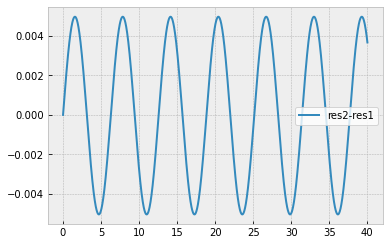

In [62]:
# for t=0

aux = []
for i in range(len(dataf[1][0])):#iterate on the grid with higher resolution
    a = 2
    if ((i>1) and (i < (len(dataf[1][0])-2)) and ((i%2)==0)): #ignoring ghost points
        aux.append(dataf[1][0][i])
        a = a+1

        
dx = 0.025 # this is the dx when the grid has resolution 1

plt_x = np.linspace(0, 1600, 1601) * dx
plt_xx = np.linspace(0, 1600+4,1605) * dx

#subtracting f in both resolutions & ignoring ghost points
diff_f_2_1 = np.subtract(dataf[0][0][2:len(dataf[0][0])-2],aux)

#plt.plot(plt_x, dataf[0][0][2:len(dataf[0][0])-2], label = 'f')
with plt.style.context('bmh'):
    plt.plot(plt_x, diff_f_2_1, label = 'res2-res1')
    #plt.plot(plt_x, dataf[0][0][2:len(dataf[0][0])-2], label = 'f')

plt.legend()
plt.show()


Resolution 4

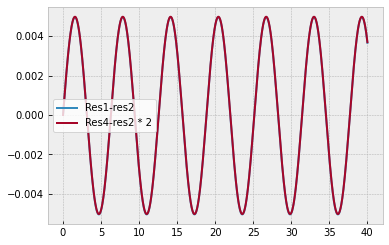

0.0

In [66]:
# for t=0

aux2 = []
for i in range(len(dataf[2][0])):#iterate on the grid with higher resolution
    a = 2
    if ((i>1) and (i < (len(dataf[2][0])-2)) and (((i-2)%4)==0)): #ignoring ghost points
        aux2.append(dataf[2][0][i])
        a = a+1


#subtracting f in both resolutions & ignoring ghost points
diff_f_4_2 = np.subtract(aux,aux2)

with plt.style.context('bmh'):
    plt.plot(plt_x, diff_f_2_1, label='Res1-res2')
    plt.plot(plt_x, diff_f_4_2*2, label='Res4-res2 * 2')


#plt.plot(plt_x,dataf[0][0][2:len(dataf[0][0])-2],label='f')


plt.legend()
plt.show()

diff_f_4_2[0]

# Plotting g with resolutions 1 and 2 and differences

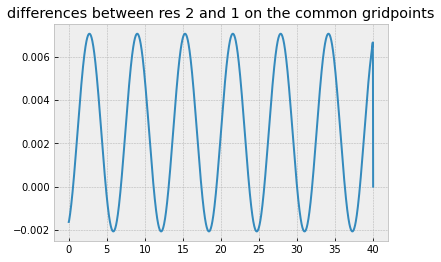

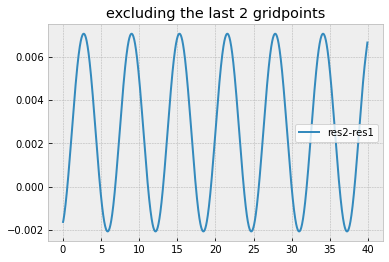

(39.8, 40.2)

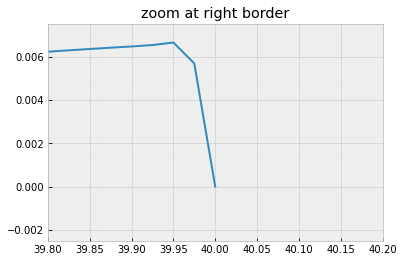

In [67]:
# for t=0

aux = []
for i in range(len(datag[1][0])):#iterate on the grid with higher resolution
    a = 2
    if ((i>1) and (i < (len(datag[1][0])-2)) and ((i%2)==0)): #ignoring ghost points
        aux.append(datag[1][0][i])
        a = a+1

#subtracting g in both resolutions & ignoring ghost points
diff_g_2_1 = np.subtract(datag[0][0][2:len(datag[0][0])-2],aux)

with plt.style.context('bmh'):
    plt.title('differences between res 2 and 1 on the common gridpoints')
    plt.plot(plt_x, diff_g_2_1, label='res2-res1')

plt.show()

with plt.style.context('bmh'):
    plt.title('excluding the last 2 gridpoints')
    plt.plot(plt_x[0:len(plt_x)-2], diff_g_2_1[0:len(plt_x)-2], label='res2-res1')


plt.legend()
plt.show()


with plt.style.context('bmh'):
    plt.title('zoom at right border')
    plt.plot(plt_x, diff_g_2_1, label='res2-res1')

plt.xlim([39.8,40.2])

Note: Because of the BC, diff of the value of g in the right boundary approaches 0. 

Resolution 4

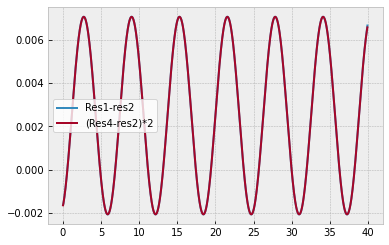

In [68]:
# for t=0

aux2 = []
for i in range(len(datag[2][0])):#iterate on the grid with higher resolution
    a = 2
    if ((i>1) and (i < (len(datag[2][0])-2)) and (((i-2)%4)==0)): #ignoring ghost points
        aux2.append(datag[2][0][i])
        a = a+1


diff_g_4_2 = np.subtract(aux,aux2)

#plt.plot(plt_x, abs(diff_g_2_1), label='Res1-res2')
#plt.plot(plt_x, abs(diff_g_4_2)*4-2*0.00125, label='Res4-res2')

with plt.style.context('bmh'):
    plt.plot(plt_x[0:len(plt_x)-2], diff_g_2_1[0:len(plt_x)-2], label='Res1-res2')
    plt.plot(plt_x[0:len(plt_x)-2], diff_g_4_2[0:len(plt_x)-2]*2, label='(Res4-res2)*2')



plt.legend()
plt.show()

Note: not plotting last 2 gridpoints for clarity reasons: the differences was too close to 0 for the plot to look good

# Plotting f with resolutions 1 and 2 and differences && now over time

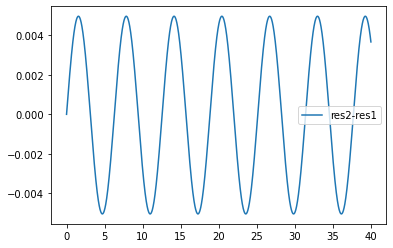

In [69]:
diff_f_2_1 = []

for t in range(len(dataf[0])): #iterate on time
    aux = []
    for i in range(len(dataf[1][t])):#iterate on the grid with higher resolution
        a = 2
        if ((i>1) and (i < (len(dataf[1][t])-2)) and ((i%2)==0)): #ignoring ghost points
            aux.append(dataf[1][t][i])
            a = a+1


    

    #subtracting f in both resolutions & ignoring ghost points
    diff_f_2_1.append(np.subtract(dataf[0][t][2:len(dataf[0][t])-2],aux))

    
dx = 0.025 # this is the dx when the grid has resolution 1

plt_x = np.linspace(0, 1600, 1601) * dx

plt.plot(plt_x, diff_f_2_1[0], label = 'res2-res1')

plt.legend()
plt.show()


note: diff_f_2_1 increases in time

TO DO:
    
    run the same thing but with other constraint functions
    
    (check) print the aux vectors to make sure the diffs plotted are right (especially and the right border of g)
    
    precision
    
    (check) make this convergence test evolve on time
    
    make the other convergence test

Plotting Grids


COMPARE EXACTLY THE SAME R :)!! needs to be 4* ou 16*
plot the same but for the higher resolution

automatize :)

In [ ]:
##########ATENÇÃOOOOO Estes linspaces têm erros





print(plt_x)

print(plt_xx)

"""cst = np.zeros(len(plt_x))
plt.scatter(plt_x,cst, 0.0001)
plt.ylim(-0.01, 0.01)"""

Experimenting other way of reading data

In [ ]:
"""df = pd.read_fwf("/home/rita13santos/Desktop/MSc Thesis/DATA/res1/time_step1.csv", header=None)

#print(df.iloc[:, 0])

cols = []

col1 = df.iloc[:, 0]
col1 = col1.to_numpy()
cols.append(col1)
    
"""f = col.filter((a, i) => i % 2 === 0)
print(f)"""

print(cols[0::2])"""